### Name: Nitya Chandra
### Roll No: 2018IMT-060
### Course: Machine Learning Lab
### Course Code: ITIT - 4107
### Deadline : 2 October 2021
### Link: https://github.com/nCk9/ITIT-4103-2021

<br>

Import necessary library

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns

<b> Generate 50 data points (one-dimensional problem) with x uniform distance from (0,1) and generate y from the formula y=sin(1+x^2)+noise Where noise has (0,0.032)distribution. Divide the data into training and test (8:2). Scatter plot the y values as well as plot the noise-free true function for train and test separately.
</b>

Creating data based on the requirement

In [ ]:
x = np.arange(0,1,1/50).reshape(-1, 1)
x = np.random.permutation(x)
y = np.sin(1+x*x)
noise = np.random.normal(0, 0.032,(50,1))
y_noise = y+noise
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.2, random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y_noise, test_size=0.2, random_state=0)

Plotting the above splitted data points

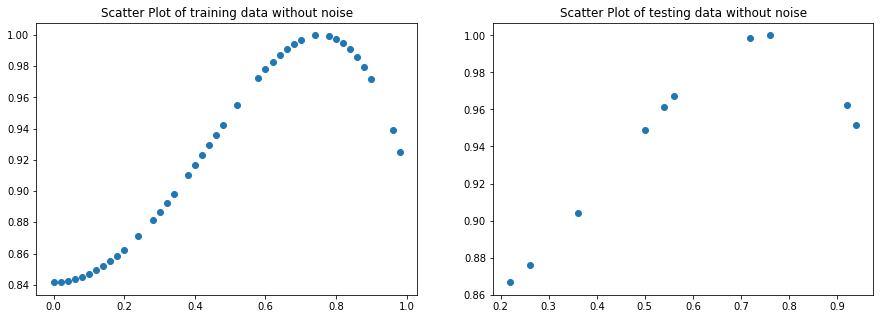

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
# sns.scatterplot(x_tr, y_tr, ax = ax[0])
# sns.scatterplot(x_te[0], y_te[0], ax = ax[1], palette="BuGn")
ax[0].scatter(x_tr, y_tr)
ax[1].scatter(x_te, y_te)
ax[0].set_title("Scatter Plot of training data without noise")
ax[1].set_title("Scatter Plot of testing data without noise")
plt.show()

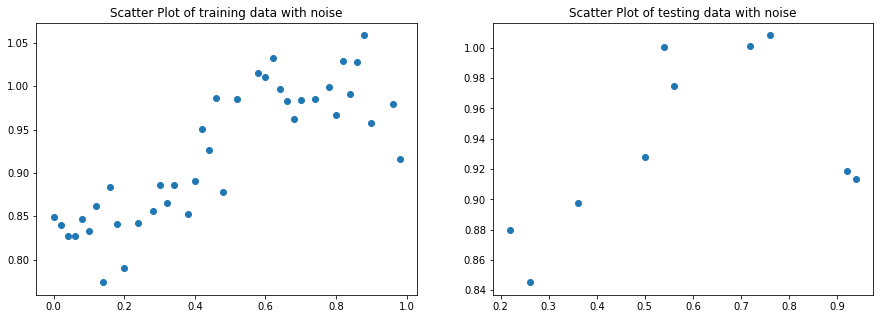

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
# sns.scatterplot(x_train, y_train, ax = ax[0])
# sns.scatterplot(x_test, y_test, ax = ax[1], palette="BuGn")
ax[0].scatter(x_train, y_train)
ax[1].scatter(x_test, y_test)
ax[0].set_title("Scatter Plot of training data with noise")
ax[1].set_title("Scatter Plot of testing data with noise")
plt.show()

<b> Implement the linear and polynomial regression models using the closed form solution as taught in the class on training data and explore their effectiveness in creating a predictor that best approximates the data using test data. Calculate the RMSE error and show the test and train results with varying degrees of a polynomial regression model to fit the data.</b>

## Implementing Linear Regression

In [ ]:
def weighnbias(x, y) :
    bias = np.ones(x.shape[0]).reshape(x.shape[0], 1)
    x = np.concatenate((bias, x), 1)
    w = np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))
    return w

w = weighnbias(x_train, y_train)

def predict(x) :
    bias = np.ones(x.shape[0]).reshape(x.shape[0], 1)
    x = np.concatenate((bias, x), 1)
    y_hat = np.dot(x, w)
    return y_hat



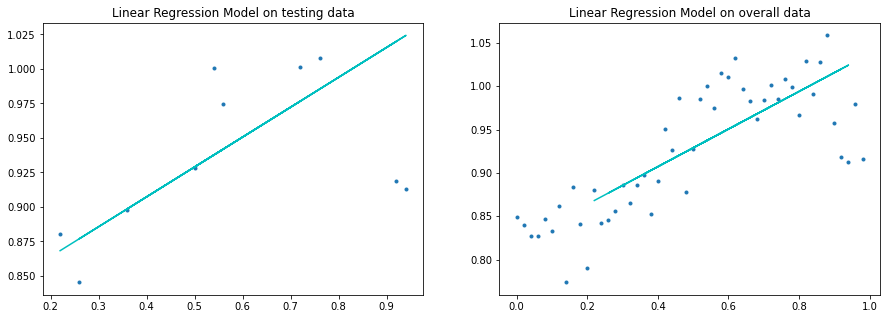

Mean Square error for the linear regression model is 0.0029909331285352015


In [ ]:
y_hat = predict(x_test)

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(x_test, y_test, '.')
ax[0].plot(x_test, y_hat, 'c')
ax[1].plot(x, y_noise, '.')
ax[1].plot(x_test, y_hat, 'c')
ax[0].set_title("Linear Regression Model on testing data")
ax[1].set_title("Linear Regression Model on overall data")
plt.show()

mse = mean_squared_error(y_test, y_hat)
print(f"Mean Square error for the linear regression model is {mse}")

#### Mean Square error from the linear regression model is 0.002934954759269551

## Implementing Polynomial Regression

In the following figure orange line shows the regression line achieved from the training data splitted above and was shown with the overall data point.

Empirical risk for degree 1 model:  0.0017579888906393351
Empirical risk for degree 2 model:  0.0015677475302508528
Empirical risk for degree 3 model:  0.0009635273558113262
Empirical risk for degree 4 model:  0.0009564337883437885


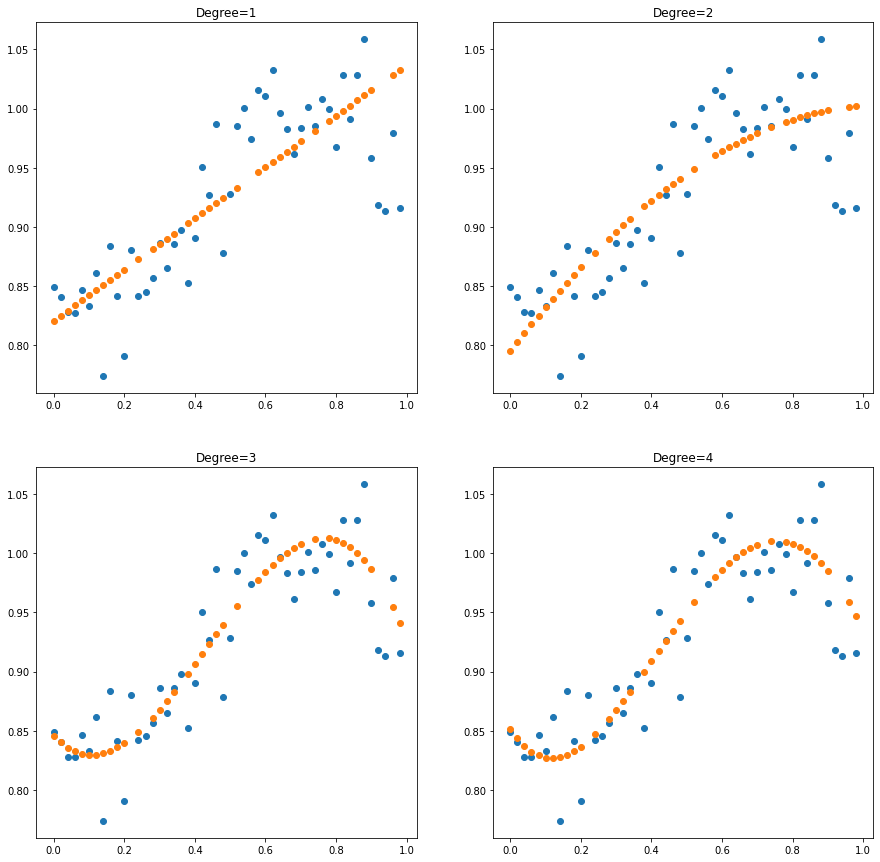

In [ ]:
#create polynomial from the input
def getPoweredX(deg, X_t):
    X_pow = X_t.copy()
    for i in range(2, deg + 1):
        powmat = (X_t[:, 1] ** i).reshape(X_pow.shape[0], 1)
        X_pow = np.append(X_pow, powmat, axis=1)
    return X_pow


def calculateEmpricalRisk(yh):
    return mean_squared_error(Y, yh)

X = x_train
X_train = np.append(np.ones((X.shape[0], 1)), X, axis=1)
Y = y_train

X_test =  np.append(np.ones((x_test.shape[0], 1)), x_test, axis=1)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,15))


# For degree 1 polynomial
deg1 = 1
X1 = getPoweredX(deg1, X_train)
X1_test = getPoweredX(deg1, X_test)
first_part = np.linalg.inv(np.dot(X1.transpose(), X1))
second_part = np.dot(first_part, X1.transpose())
W1 = np.dot(second_part, Y)

ax1.scatter(x, y_noise)
ax1.scatter(X1[:,1], np.dot(X1, W1))
ax1.set_title("Degree=1")
print("Empirical risk for degree 1 model: ", calculateEmpricalRisk(np.dot(X1, W1)))


# For degree 2 polynomial
deg2 = 2
X2 = getPoweredX(deg2, X_train)
X2_test = getPoweredX(deg2, X_test)

first_part = np.linalg.pinv(np.dot(X2.transpose(), X2))
second_part = np.dot(first_part, X2.transpose())
W2 = np.dot(second_part, Y)

ax2.scatter(x, y_noise)
ax2.scatter(X2[:,1], np.dot(X2, W2))
ax2.set_title("Degree=2")
print("Empirical risk for degree 2 model: ", calculateEmpricalRisk(np.dot(X2, W2)))


# For degree 3 polynomial
deg3 = 3
X3 = getPoweredX(deg3, X_train)
X3_test = getPoweredX(deg3, X_test)

first_part = np.linalg.pinv(np.dot(X3.transpose(), X3))
second_part = np.dot(first_part, X3.transpose())
W3 = np.dot(second_part, Y)

ax3.scatter(x, y_noise)
ax3.scatter(X3[:,1], np.dot(X3, W3))
ax3.set_title("Degree=3")
print("Empirical risk for degree 3 model: ", calculateEmpricalRisk(np.dot(X3, W3)))


# For degree 4 polynomial
deg4 = 4
X4 = getPoweredX(deg4, X_train)
X4_test = getPoweredX(deg4, X_test)

first_part = np.linalg.pinv(np.dot(X4.transpose(), X4))
second_part = np.dot(first_part, X4.transpose())
W4 = np.dot(second_part, Y)

ax4.scatter(x, y_noise)
ax4.scatter(X4[:,1],np.dot(X4,W4))
ax4.set_title("Degree=4")
print("Empirical risk for degree 4 model: ", calculateEmpricalRisk(np.dot(X4, W4)))
plt.show()

Mean Square error(MSE) for the polynomial regression model is 0.001016419309706263 which is around 3 times much more accurate the linear regression model which has MSE of 0.002934954759269551